In [1]:
using DataFrames
using Gadfly
set_default_plot_size(30cm, 12cm)
home = "/home/german/labo/18/lbp/run"
rtdos = "/home/german/labo/18/lbp/rtdos_log"

"/home/german/labo/18/lbp/rtdos_log"

In [2]:
function tognm(vtor_anm)
    vtor_gnm = Array{Float64}
    try
        vtor_gnm = Array{Float64}(convert(Int64, length(vtor_anm)/3));
    catch e
        warn("Input vector's length is not a 3 multiplier")
        error(e)
    end
    vtor_anm =  vtor_anm.^2
    for i=1:convert(Int64, length(vtor_anm)/3)
        vtor_gnm[i] = sqrt(vtor_anm[i*3-2] + vtor_anm[i*3-1] + vtor_anm[i*3])
    end
    return vtor_gnm
end

tognm (generic function with 1 method)

## Freqs / evals

In [3]:
df_Whis_evals_4uet = readtable(joinpath(rtdos, "freq_hist_4uet"), separator = '\t')
df_Whis_evals_4xcp = readtable(joinpath(rtdos, "freq_hist_4xcp"), separator = '\t')
df_Whis_evals = [ df_Whis_evals_4uet ; df_Whis_evals_4xcp ];
df_Whis_evals[:Conformer] = repeat(["4UET", "4XCP"], inner = size(df_Whis_evals_4xcp)[1]);

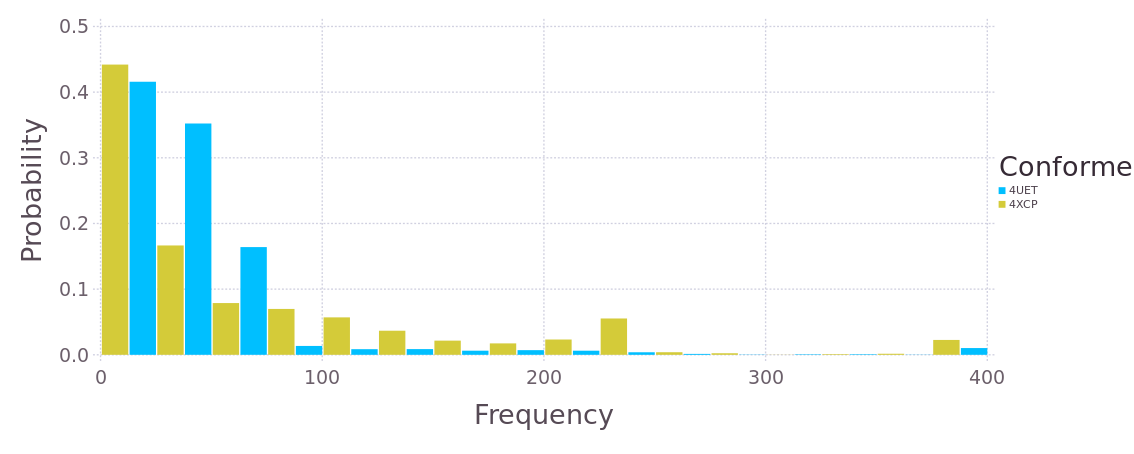

In [4]:
pdf_Whis_evals = plot(df_Whis_evals, x = "Frequency", y = "Probability", color = "Conformer",
    Geom.bar(position=:dodge),
    #Guide.title("Cut"),
    #Coord.cartesian(xmin = 300, xmax = 1800, ymax = 0.002),
    #Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    #Guide.ylabel("δV * Probability", orientation=:vertical),
    
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"DarkBlue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

## Volumen

In [15]:
df_Whis_vol_4uet = readtable(joinpath(rtdos, "hist_vol_4uet") , separator = '\t')
df_Whis_vol_4xcp = readtable(joinpath(rtdos, "hist_vol_4xcp") , separator = '\t');
df_Whis_vol = [ df_Whis_vol_4uet ; df_Whis_vol_4xcp ];
df_Whis_vol[:Conformer] = repeat(["4UET", "4XCP"], inner = size(df_Whis_vol_4xcp)[1]);

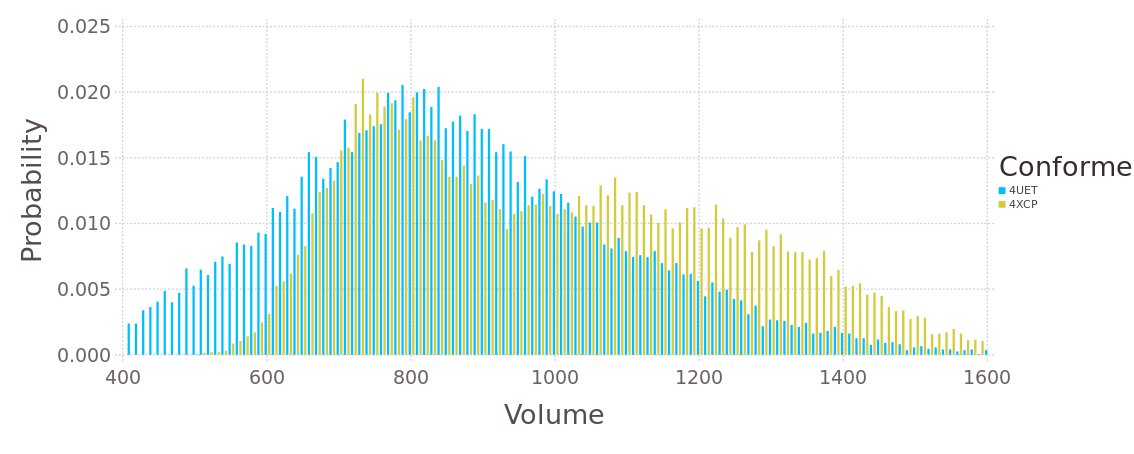

In [19]:
pdf_Whis_vol = plot(df_Whis_vol, x = "Volume", y = "Probability", color = "Conformer",
    Geom.bar(position=:dodge),
    #Guide.title("Cut"),
    Coord.cartesian(xmin = 400, xmax = 1600, ymax = 0.025),
    #Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    #Guide.ylabel("δV * Probability", orientation=:vertical),
    
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"DarkBlue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

## Gdte cartesiano

In [7]:
car_vgv_4uet = readdlm(joinpath(rtdos, "car_vgv_4uet"))[:, 1]
car_vgv_4xcp = readdlm(joinpath(rtdos, "car_vgv_4xcp"))[:, 1]

405-element Array{Float64,1}:
 -0.019816  
 -0.0382043 
 -0.0223349 
 -0.03457   
 -0.00323366
  0.0102628 
 -0.0260184 
  0.0139797 
  0.0149972 
  0.0104511 
  0.00255396
 -0.00310809
  0.0415505 
  ⋮         
  0.00354031
 -0.0197717 
  0.0240157 
  0.0171245 
 -0.0172627 
  0.0381837 
 -0.0128808 
 -0.014176  
  0.055761  
  0.0111598 
 -0.0330185 
  0.0400454 

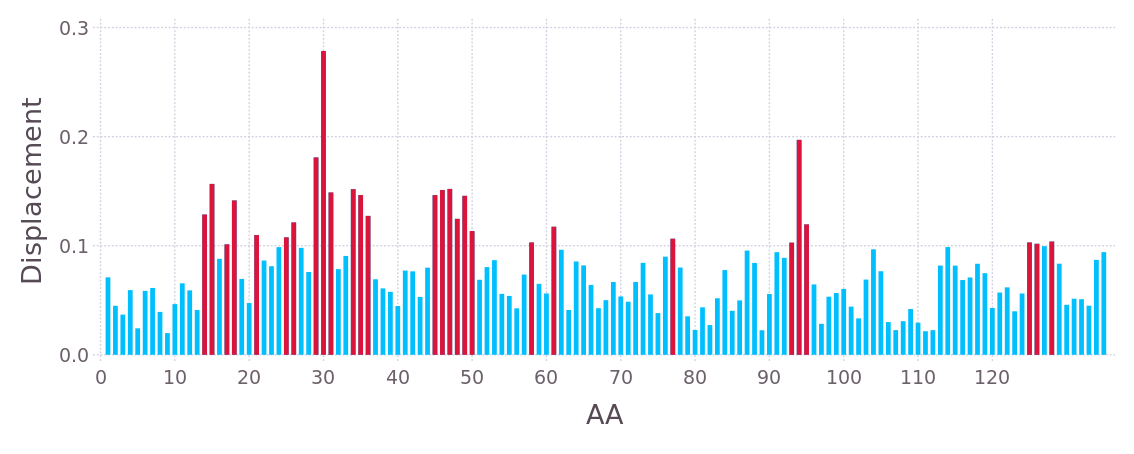

In [8]:
tmp = tognm(car_vgv_4uet)
tmp_ = copy(tmp)
tmp_[tmp_ .< .1] .= 0.

layer_temp_1 = layer(DataFrame(Displacement = tmp), Geom.bar, y = "Displacement")
layer_temp_2 = layer(DataFrame(Displacement = tmp_), Geom.bar, y = "Displacement",
Theme(default_color=colorant"crimson", bar_spacing=2pt))


pdf_cart_gdte_4uet = plot(layer_temp_2, layer_temp_1,
    Guide.xlabel("AA"),
    Guide.ylabel("Displacement"), Coord.cartesian(ymax = 0.5),
    Guide.xticks(ticks=collect(0:10:120)),
    Coord.cartesian(ymax = .301),
    
    Theme(bar_spacing=2pt, grid_line_width=1pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt,
        key_label_font_size = 15pt))

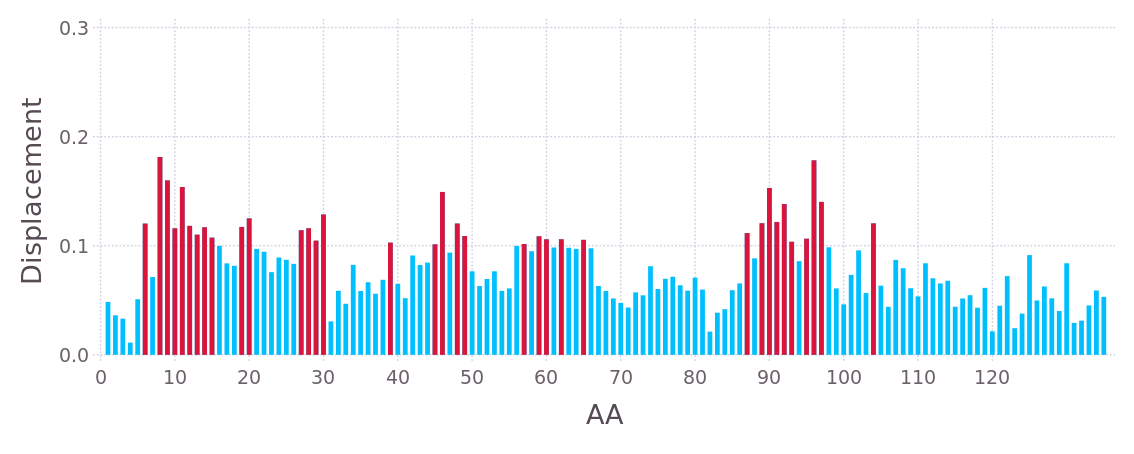

In [9]:
tmp = tognm(car_vgv_4xcp)
tmp_ = copy(tmp)
tmp_[tmp_ .< .1] .= 0.

layer_temp_1 = layer(DataFrame(Displacement = tmp), Geom.bar, y = "Displacement")
layer_temp_2 = layer(DataFrame(Displacement = tmp_), Geom.bar, y = "Displacement",
Theme(default_color=colorant"crimson", bar_spacing=2pt))


pdf_cart_gdte_4xcp = plot(layer_temp_2, layer_temp_1,
    Guide.xlabel("AA"),
    Guide.ylabel("Displacement"), Coord.cartesian(ymax = 0.5),
    Guide.xticks(ticks=collect(0:10:120)),
    Coord.cartesian(ymax = .301),
    
    Theme(bar_spacing=2pt, grid_line_width=1pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt,
        key_label_font_size = 15pt))

# Energías

In [10]:
E_4uet = readdlm(joinpath(rtdos, "energia_4uet"))[:, 1]
E_4xcp = readdlm(joinpath(rtdos, "energia_4xcp"))[:, 1]

points = 21
maxi = floor(points / 2)
mini = -maxi
RT = 0.693

df_E = DataFrame( U = [ E_4uet ; E_4xcp ],
    Displacement = repeat(repeat(collect(mini:1:maxi) * 5E-1, outer = [1]), outer = 2),
    Conformer = repeat(["4UET", "4XCP"], inner = points));

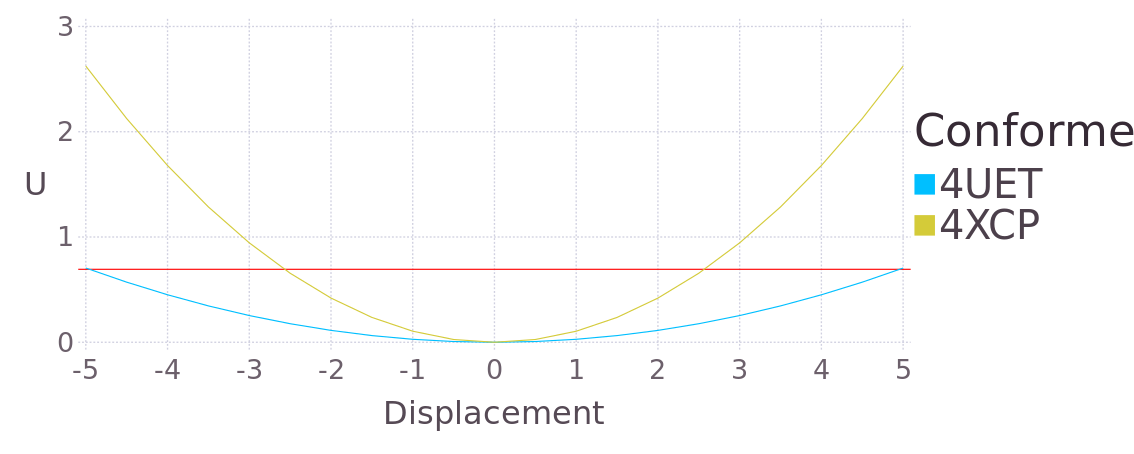

In [11]:
pdf_E = plot(df_E, y = "U", x = "Displacement", color = "Conformer", Geom.line,
    yintercept = [RT], Geom.hline(color = "red"),
    Guide.xticks(ticks = collect(mini:2:maxi) * 5e-1),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 20pt, major_label_font_size = 24pt, key_title_font_size = 34pt,
        key_label_font_size = 30pt))